<a href="https://colab.research.google.com/github/santiagonajera/MODELACION-Y-PRONOSTICOS-DE-LA-DEMANDA/blob/main/Promedio_Movil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Descargar el archivo y leer la hoja 'Unidades'
url = 'https://github.com/santiagonajera/MODELACION-Y-PRONOSTICOS-DE-LA-DEMANDA/raw/refs/heads/main/Ventas_Forecasting_2020_2025-Cosmeticos.xlsx'
df = pd.read_excel(url, sheet_name='Unidades')

# Asegurar columnas correctas
df.columns = ["Mes", "Producto_1"]

# Convertir columna 'Mes' a tipo fecha (asumiendo formato 'ene-21', etc.)
df['Mes'] = pd.to_datetime(df['Mes'], format='%b-%y')

# Calcular promedio móvil de 2 periodos (shift para alinear forecast al futuro)
df['Forecast'] = df['Producto_1'].rolling(window=2).mean().shift(1)

# Proyección a 6 meses adelante usando el último promedio móvil calculado
last_moving_avg = df['Forecast'].dropna().iloc[-1]
future_months = pd.date_range(start=df['Mes'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
future_forecast = [last_moving_avg]*6
future_df = pd.DataFrame({'Mes': future_months, 'Producto_1': [None]*6, 'Forecast': future_forecast})

# Concatenar serie original y futuro
plot_df = pd.concat([df, future_df], ignore_index=True)

# Graficar resultados
plt.figure(figsize=(10,6))
plt.plot(plot_df['Mes'], plot_df['Producto_1'], marker='o', label='Serie Original')
plt.plot(plot_df['Mes'], plot_df['Forecast'], marker='x', linestyle='--', label='Forecast (Promedio móvil 2p)')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.title('Ventas y Pronóstico por Promedio Móvil (2 Periodos)')
plt.legend()
plt.tight_layout()
plt.show()


ValueError: Length mismatch: Expected axis has 17 elements, new values have 2 elements

  Meses (Fecha)  Producto_1  Producto_10  Producto_11  Producto_12  \
0    2021-01-01         120          289          146          216   
1    2021-02-01         129          323          183          218   
2    2021-03-01         148          334          177          238   
3    2021-04-01         164          350          203          270   
4    2021-05-01         148          339          204          246   

   Producto_13  Producto_14  Producto_15  Producto_2  Producto_3  Producto_4  \
0           96          248          142         133         137         107   
1          114          279          181         159         130         127   
2          114          277          174         183         156         176   
3          123          302          166         173         175         151   
4          117          303          182         188         148         156   

   Producto_5  Producto_6  Producto_7  Producto_8  Producto_9  Total general  
0         234      

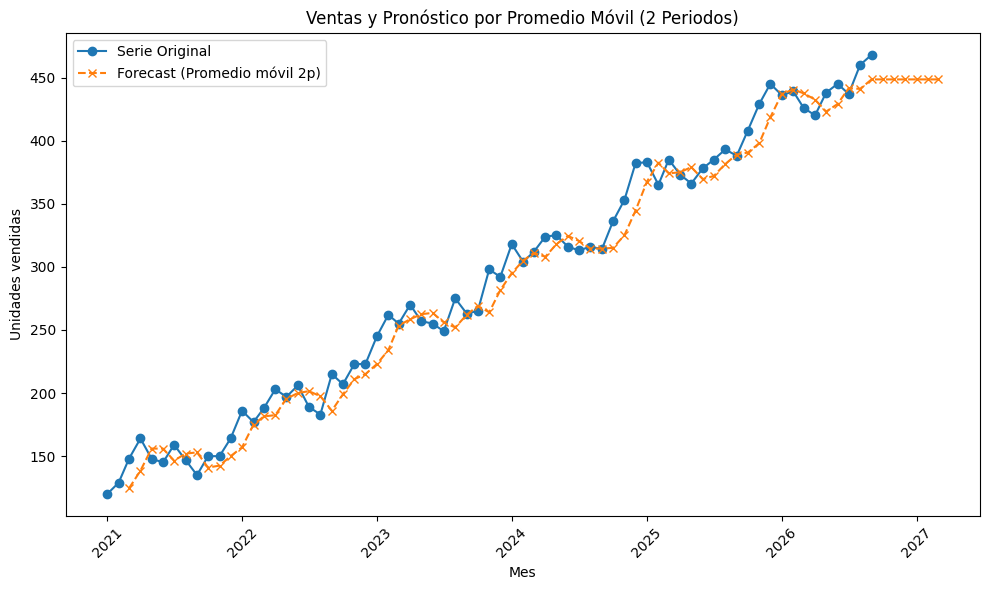

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Descargar y leer el archivo Excel en la hoja 'Unidades'
url = 'https://github.com/santiagonajera/MODELACION-Y-PRONOSTICOS-DE-LA-DEMANDA/raw/refs/heads/main/Ventas_Forecasting_2020_2025-Cosmeticos.xlsx'
df = pd.read_excel(url, sheet_name='Unidades')

# Revisar las primeras filas y columnas
print(df.head())   # Esto ayuda a identificar la estructura antes de manipular nombres

# Seleccionar sólo las columnas relevantes (por posición, ejemplo: columna A y B)
venta_data = df.iloc[:, [0, 1]].copy()
venta_data.columns = ["Mes", "Producto_1"]

# Limpiar posibles filas vacías, de totales o encabezados extra
venta_data = venta_data.dropna(subset=["Mes", "Producto_1"])
venta_data = venta_data[venta_data["Mes"].astype(str).str.len() > 0]

# Convertir fechas y proceder como en el ejemplo anterior
venta_data["Mes"] = pd.to_datetime(venta_data["Mes"], format='%b-%y', errors='coerce')
venta_data = venta_data.dropna(subset=["Mes"])

venta_data['Forecast'] = venta_data['Producto_1'].rolling(window=2).mean().shift(1)

last_moving_avg = venta_data['Forecast'].dropna().iloc[-1]
future_months = pd.date_range(start=venta_data['Mes'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
future_df = pd.DataFrame({'Mes': future_months, 'Producto_1': [None]*6, 'Forecast': [last_moving_avg]*6})

plot_df = pd.concat([venta_data, future_df], ignore_index=True)

plt.figure(figsize=(10,6))
plt.plot(plot_df['Mes'], plot_df['Producto_1'], marker='o', label='Serie Original')
plt.plot(plot_df['Mes'], plot_df['Forecast'], marker='x', linestyle='--', label='Forecast (Promedio móvil 2p)')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.title('Ventas y Pronóstico por Promedio Móvil (2 Periodos)')
plt.legend()
plt.tight_layout()
plt.show()


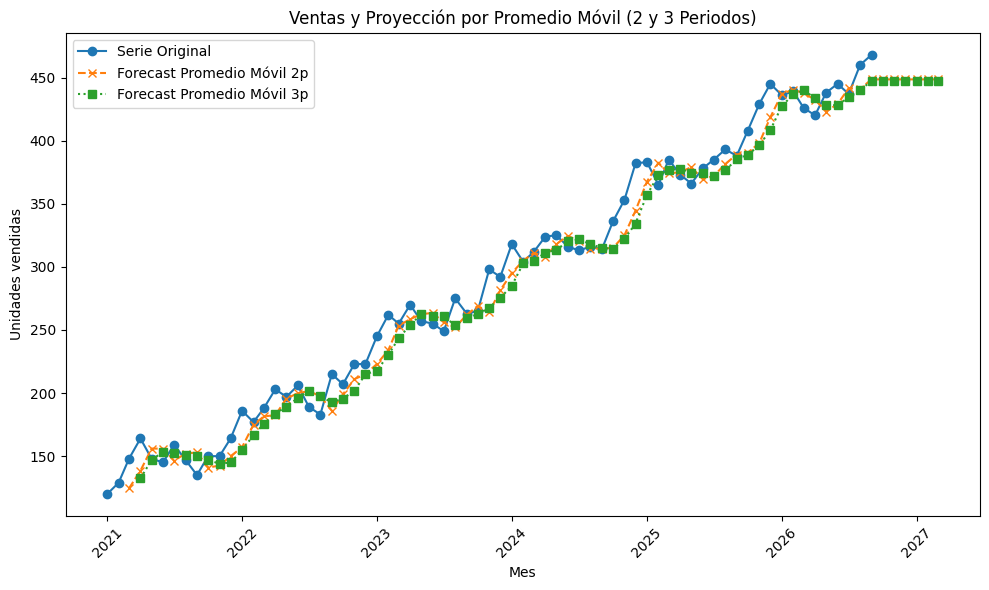

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/santiagonajera/MODELACION-Y-PRONOSTICOS-DE-LA-DEMANDA/raw/refs/heads/main/Ventas_Forecasting_2020_2025-Cosmeticos.xlsx'
df = pd.read_excel(url, sheet_name='Unidades')

# Inspecciona las primeras filas para identificar estructura
venta_data = df.iloc[:, [0, 1]].copy()
venta_data.columns = ["Mes", "Producto_1"]
venta_data = venta_data.dropna(subset=["Mes", "Producto_1"])
venta_data = venta_data[venta_data["Mes"].astype(str).str.len() > 0]
venta_data["Mes"] = pd.to_datetime(venta_data["Mes"], format='%b-%y', errors='coerce')
venta_data = venta_data.dropna(subset=["Mes"])

# Forecast de promedio móvil de 2 y 3 periodos
venta_data['Forecast_2p'] = venta_data['Producto_1'].rolling(window=2).mean().shift(1)
venta_data['Forecast_3p'] = venta_data['Producto_1'].rolling(window=3).mean().shift(1)

# Proyección 6 meses adelante usando último valor de cada forecast
last_2p = venta_data['Forecast_2p'].dropna().iloc[-1]
last_3p = venta_data['Forecast_3p'].dropna().iloc[-1]
future_months = pd.date_range(start=venta_data['Mes'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

future_df = pd.DataFrame({
    'Mes': future_months,
    'Producto_1': [None]*6,
    'Forecast_2p': [last_2p]*6,
    'Forecast_3p': [last_3p]*6
})

plot_df = pd.concat([venta_data, future_df], ignore_index=True)

plt.figure(figsize=(10,6))
plt.plot(plot_df['Mes'], plot_df['Producto_1'], marker='o', label='Serie Original')
plt.plot(plot_df['Mes'], plot_df['Forecast_2p'], marker='x', linestyle='--', label='Forecast Promedio Móvil 2p')
plt.plot(plot_df['Mes'], plot_df['Forecast_3p'], marker='s', linestyle=':', label='Forecast Promedio Móvil 3p')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.title('Ventas y Proyección por Promedio Móvil (2 y 3 Periodos)')
plt.legend()
plt.tight_layout()
plt.show()


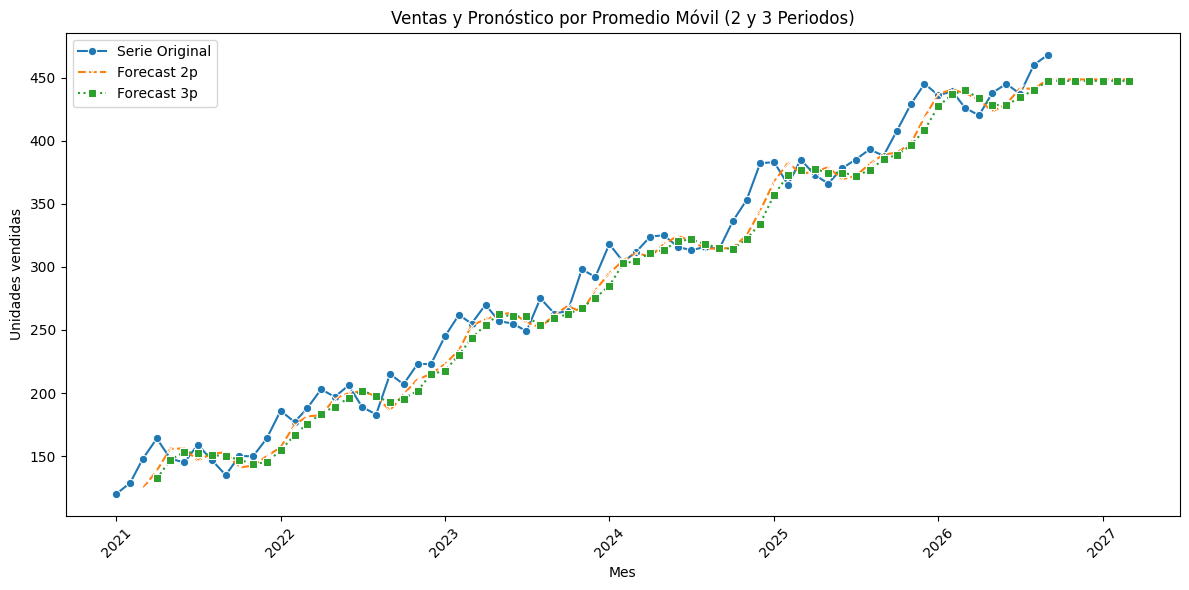

RMSE Promedio móvil 2 periodos: 15.80
RMSE Promedio móvil 3 periodos: 17.47


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar y leer la hoja 'Unidades'
url = 'https://github.com/santiagonajera/MODELACION-Y-PRONOSTICOS-DE-LA-DEMANDA/raw/refs/heads/main/Ventas_Forecasting_2020_2025-Cosmeticos.xlsx'
df = pd.read_excel(url, sheet_name='Unidades')

# Seleccionar solo las 2 primeras columnas y renombrar
venta_data = df.iloc[:, [0, 1]].copy()
venta_data.columns = ["Mes", "Producto_1"]

# Limpiar: quitar filas vacías y convertir fechas
venta_data = venta_data.dropna(subset=["Mes", "Producto_1"])
venta_data = venta_data[venta_data["Mes"].astype(str).str.len() > 0]
venta_data["Mes"] = pd.to_datetime(venta_data["Mes"], format='%b-%y', errors='coerce')
venta_data = venta_data.dropna(subset=["Mes"])

# Forecast: promedio móvil 2 y 3 periodos (advertencia: el forecast comienza en la n+1)
venta_data['Forecast_2p'] = venta_data['Producto_1'].rolling(window=2).mean().shift(1)
venta_data['Forecast_3p'] = venta_data['Producto_1'].rolling(window=3).mean().shift(1)

# Proyección 6 meses adelante usando los últimos valores de moving average
last_2p = venta_data['Forecast_2p'].dropna().iloc[-1]
last_3p = venta_data['Forecast_3p'].dropna().iloc[-1]
future_months = pd.date_range(start=venta_data['Mes'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
future_df = pd.DataFrame({
    'Mes': future_months,
    'Producto_1': [None]*6,
    'Forecast_2p': [last_2p]*6,
    'Forecast_3p': [last_3p]*6
})

# Concatenar
plot_df = pd.concat([venta_data, future_df], ignore_index=True)

# Graficar con seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_df, x='Mes', y='Producto_1', marker='o', label='Serie Original')
sns.lineplot(data=plot_df, x='Mes', y='Forecast_2p', marker='x', linestyle='--', label='Forecast 2p')
sns.lineplot(data=plot_df, x='Mes', y='Forecast_3p', marker='s', linestyle=':', label='Forecast 3p')
plt.title("Ventas y Pronóstico por Promedio Móvil (2 y 3 Periodos)")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular RMSE
mask_2p = venta_data['Forecast_2p'].notnull()
mask_3p = venta_data['Forecast_3p'].notnull()
rmse_2p = np.sqrt(np.mean((venta_data.loc[mask_2p, 'Producto_1'] - venta_data.loc[mask_2p, 'Forecast_2p']) ** 2))
rmse_3p = np.sqrt(np.mean((venta_data.loc[mask_3p, 'Producto_1'] - venta_data.loc[mask_3p, 'Forecast_3p']) ** 2))

print(f"RMSE Promedio móvil 2 periodos: {rmse_2p:.2f}")
print(f"RMSE Promedio móvil 3 periodos: {rmse_3p:.2f}")


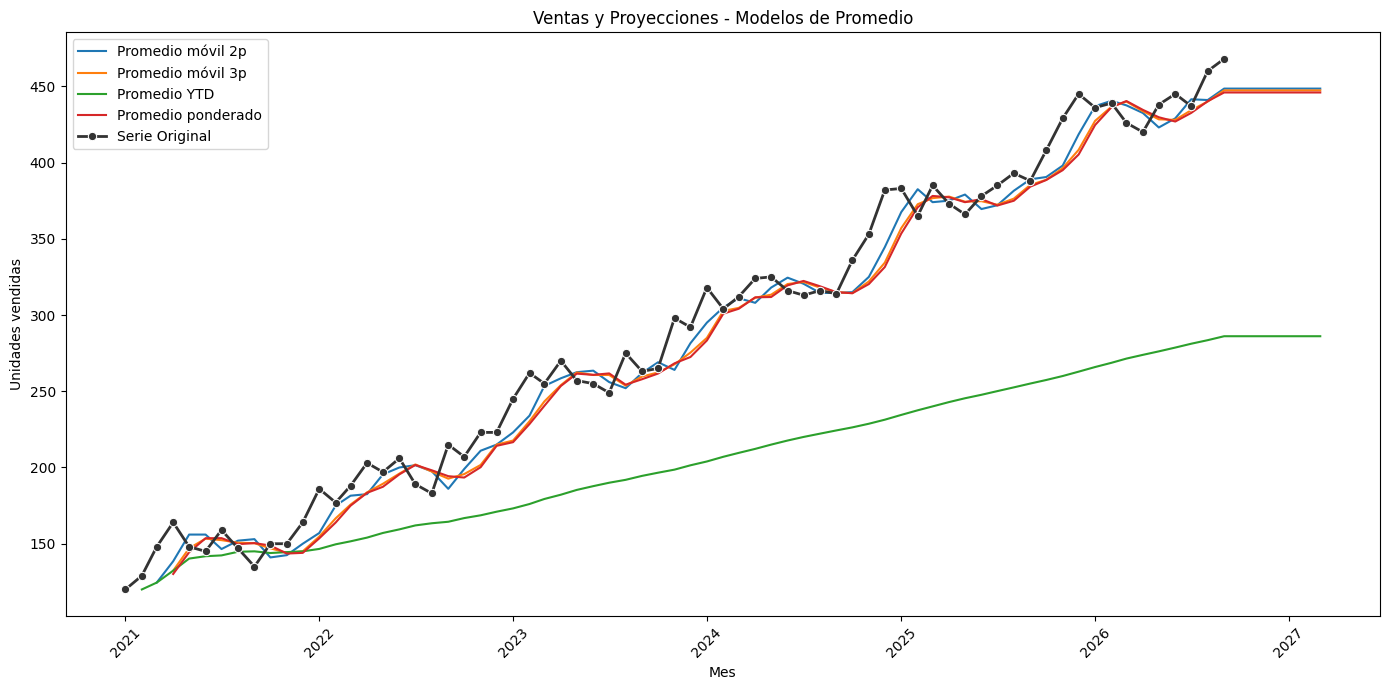

RMSE Promedio móvil 2p: 15.80
RMSE Promedio móvil 3p: 17.47
RMSE Year-to-Date: 103.82
RMSE Promedio ponderado: 18.35


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar y leer la hoja 'Unidades'
url = 'https://github.com/santiagonajera/MODELACION-Y-PRONOSTICOS-DE-LA-DEMANDA/raw/refs/heads/main/Ventas_Forecasting_2020_2025-Cosmeticos.xlsx'
df = pd.read_excel(url, sheet_name='Unidades')

# Selección y limpieza
venta_data = df.iloc[:, [0, 1]].copy()
venta_data.columns = ["Mes", "Producto_1"]
venta_data = venta_data.dropna(subset=["Mes", "Producto_1"])
venta_data = venta_data[venta_data["Mes"].astype(str).str.len() > 0]
venta_data["Mes"] = pd.to_datetime(venta_data["Mes"], format='%b-%y', errors='coerce')
venta_data = venta_data.dropna(subset=["Mes"])

# Forecast promedio móvil simple
venta_data['Forecast_2p'] = venta_data['Producto_1'].rolling(window=2).mean().shift(1)
venta_data['Forecast_3p'] = venta_data['Producto_1'].rolling(window=3).mean().shift(1)

# Forecast promedio YTD
venta_data['Forecast_YTD'] = venta_data['Producto_1'].expanding().mean().shift(1)

# Forecast promedio ponderado (t-1: 40%, t-2: 35%, t-3: 25%)
weights = np.array([0.4, 0.35, 0.25])
def weighted_mv(series):
    if len(series) < 3:
        return np.nan
    return np.dot(series[-3:], weights)
venta_data['Forecast_ponderado'] = (
    venta_data['Producto_1'].rolling(window=3).apply(weighted_mv, raw=True).shift(1)
)

# Proyección: usar el último valor calculado de cada modelo
n_proy = 6
last_mes = venta_data['Mes'].iloc[-1]
future_months = pd.date_range(start=last_mes + pd.DateOffset(months=1), periods=n_proy, freq='MS')
last_2p = venta_data['Forecast_2p'].dropna().iloc[-1]
last_3p = venta_data['Forecast_3p'].dropna().iloc[-1]
last_ytd = venta_data['Forecast_YTD'].dropna().iloc[-1]
last_pond = venta_data['Forecast_ponderado'].dropna().iloc[-1]

future_df = pd.DataFrame({
    'Mes': future_months,
    'Producto_1': [None]*n_proy,
    'Forecast_2p': [last_2p]*n_proy,
    'Forecast_3p': [last_3p]*n_proy,
    'Forecast_YTD': [last_ytd]*n_proy,
    'Forecast_ponderado': [last_pond]*n_proy
})

plot_df = pd.concat([venta_data, future_df], ignore_index=True)

# Graficar series con seaborn (solo marcadores en datos originales)
plt.figure(figsize=(14,7))
sns.lineplot(data=plot_df, x='Mes', y='Forecast_2p', label='Promedio móvil 2p', marker=None)
sns.lineplot(data=plot_df, x='Mes', y='Forecast_3p', label='Promedio móvil 3p', marker=None)
sns.lineplot(data=plot_df, x='Mes', y='Forecast_YTD', label='Promedio YTD', marker=None)
sns.lineplot(data=plot_df, x='Mes', y='Forecast_ponderado', label='Promedio ponderado', marker=None)
sns.lineplot(data=plot_df, x='Mes', y='Producto_1', label='Serie Original', marker='o', linewidth=2, color='#333')

plt.title("Ventas y Proyecciones - Modelos de Promedio")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular RMSE de cada modelo
def calc_rmse(real, pred):
    mask = pred.notnull()
    return np.sqrt(((real[mask] - pred[mask]) ** 2).mean())

rmse_2p = calc_rmse(venta_data['Producto_1'], venta_data['Forecast_2p'])
rmse_3p = calc_rmse(venta_data['Producto_1'], venta_data['Forecast_3p'])
rmse_ytd = calc_rmse(venta_data['Producto_1'], venta_data['Forecast_YTD'])
rmse_pond = calc_rmse(venta_data['Producto_1'], venta_data['Forecast_ponderado'])

print(f"RMSE Promedio móvil 2p: {rmse_2p:.2f}")
print(f"RMSE Promedio móvil 3p: {rmse_3p:.2f}")
print(f"RMSE Year-to-Date: {rmse_ytd:.2f}")
print(f"RMSE Promedio ponderado: {rmse_pond:.2f}")
